In [1]:
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices

In [2]:
import os

In [3]:
import matplotlib.pyplot as plt

In [4]:
basepath = 'C:/Users/roseh/Desktop/NYBG_R/'
file_location = 'data/processed/merge'
os.chdir(os.path.join(basepath, file_location))

In [5]:
df = pd.read_csv('all_merged.csv', usecols=[1,2,4,6,7])
df.columns = ['Date','CO2_Flux','Land_Type','Soil_Temp','Soil_Moisture']
df.head()

,Date,CO2_Flux,Land_Type,Soil_Temp,Soil_Moisture
0,2022-05-31 08:13:00,33.04108,TP,23.1,38.0
1,2022-05-31 08:17:00,21.48947,TP,23.4,38.0
2,2022-05-31 08:22:00,15.34051,TP,23.6,51.1
3,2022-05-31 08:55:00,22.07139,HL,22.3,47.1
4,2022-05-31 09:49:00,25.58471,HL,23.0,32.3


In [6]:
grouped = df.groupby('Land_Type')

In [7]:
grouped.first()

,Date,CO2_Flux,Soil_Temp,Soil_Moisture
Land_Type,,,,
FE,2022-05-31 10:06:00,5.64992,19.4,61.4
FI,2022-05-31 10:21:00,10.73725,18.9,20.9
HL,2022-05-31 08:55:00,22.07139,22.3,47.1
ML,2022-07-06 09:36:00,25.41063,24.9,68.3
SV,2022-05-31 11:04:00,7.95627,20.9,45.4
TP,2022-05-31 08:13:00,33.04108,23.1,38.0
UL,2022-05-31 11:25:00,11.28240,22.7,40.8


In [8]:
TP = grouped.get_group('TP')

In [9]:
FE = grouped.get_group('FE')
FI = grouped.get_group('FI')
HL = grouped.get_group('HL')
ML = grouped.get_group('ML')
SV = grouped.get_group('SV')
UL = grouped.get_group('UL')

In [10]:
def get_regression(df):
    y, X = dmatrices('CO2_Flux ~ Soil_Temp', data=df, return_type='dataframe')
    model = sm.OLS(y,X)
    result = model.fit()
    print(result.summary())
    return result

In [11]:
HL_result = get_regression(HL)

                            OLS Regression Results                            
Dep. Variable:               CO2_Flux   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     35.07
Date:                Thu, 03 Nov 2022   Prob (F-statistic):           2.15e-07
Time:                        09:46:52   Log-Likelihood:                -172.73
No. Observations:                  57   AIC:                             349.5
Df Residuals:                      55   BIC:                             353.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.8011      6.050      8.562      0.0

In [12]:
FE_result = get_regression(FE)

                            OLS Regression Results                            
Dep. Variable:               CO2_Flux   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.338
Date:                Thu, 03 Nov 2022   Prob (F-statistic):              0.262
Time:                        09:46:52   Log-Likelihood:                -52.089
No. Observations:                  21   AIC:                             108.2
Df Residuals:                      19   BIC:                             110.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.6969      8.832      1.890      0.0

In [13]:
FI_result = get_regression(FI)

                            OLS Regression Results                            
Dep. Variable:               CO2_Flux   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.7107
Date:                Thu, 03 Nov 2022   Prob (F-statistic):              0.412
Time:                        09:46:53   Log-Likelihood:                -40.579
No. Observations:                  18   AIC:                             85.16
Df Residuals:                      16   BIC:                             86.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.5309      7.521      1.666      0.1

C:\Users\roseh\miniconda3\envs\sr-env\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [14]:
SV_result = get_regression(SV)

                            OLS Regression Results                            
Dep. Variable:               CO2_Flux   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.045
Method:                 Least Squares   F-statistic:                  0.001549
Date:                Thu, 03 Nov 2022   Prob (F-statistic):              0.969
Time:                        09:46:53   Log-Likelihood:                -67.153
No. Observations:                  24   AIC:                             138.3
Df Residuals:                      22   BIC:                             140.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.1904      5.670      1.268      0.2

In [15]:
UL_result = get_regression(UL)

                            OLS Regression Results                            
Dep. Variable:               CO2_Flux   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     15.22
Date:                Thu, 03 Nov 2022   Prob (F-statistic):           0.000304
Time:                        09:46:53   Log-Likelihood:                -138.10
No. Observations:                  49   AIC:                             280.2
Df Residuals:                      47   BIC:                             284.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.1204      3.809      7.119      0.0

In [16]:
def plot_regression(df, result):
    fig,ax = plt.subplots(figsize=(8,6))
    ax.plot(df['Soil_Temp'],df['CO2_Flux'],'o')
    ax.plot(df['Soil_Temp'],result.fittedvalues, "r--.")

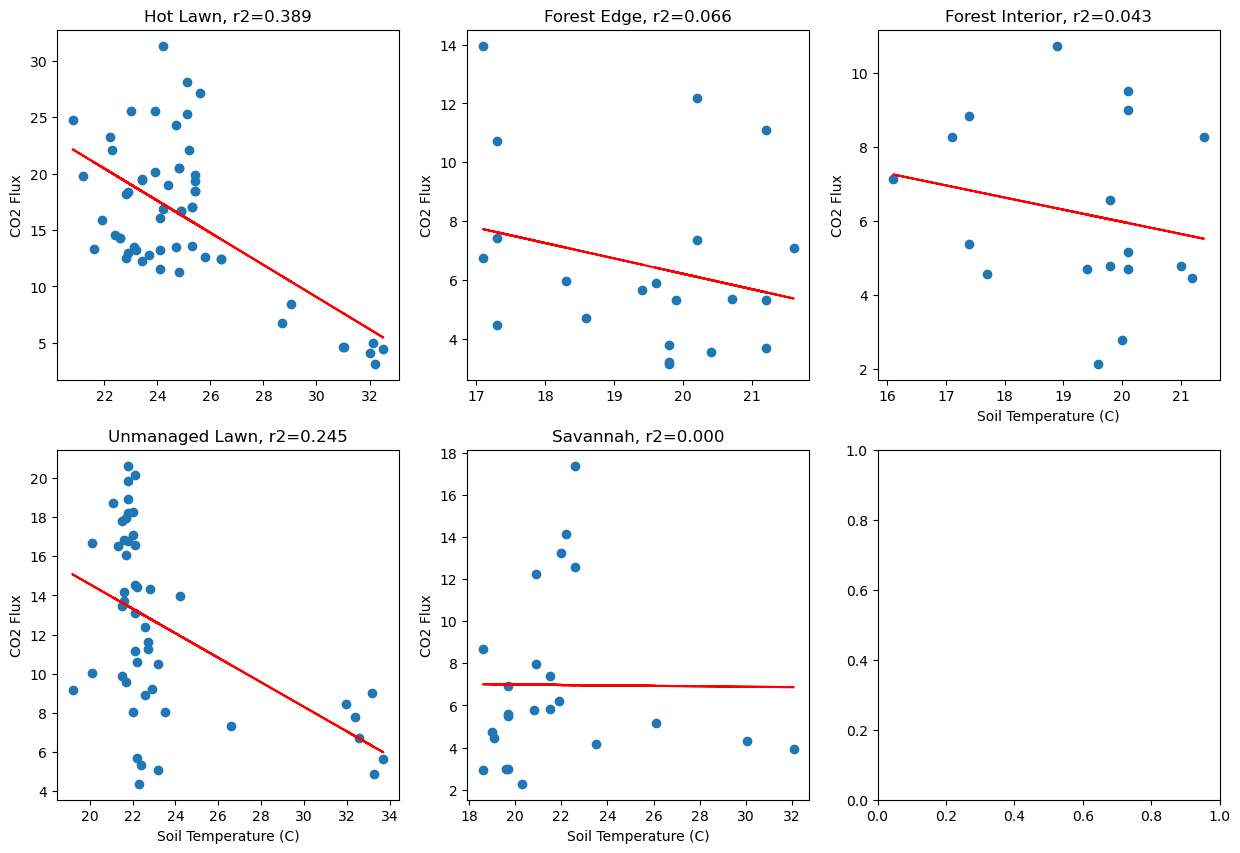

In [21]:
fig,axes = plt.subplots(2,3,figsize=(15,10))

hot_lawn = axes[0][0]
forest_edge = axes[0][1]
forest_interior = axes[0][2]
unmanaged_lawn = axes[1][0]
savannah = axes[1][1]

#hot_lawn.set_xlabel('Soil Temperature (C)')
hot_lawn.set_ylabel('CO2 Flux')
hot_lawn.set_title(f'Hot Lawn, r2={HL_result.rsquared:.3f}')
hot_lawn.plot(HL['Soil_Temp'],HL['CO2_Flux'],'o')
hot_lawn.plot(HL['Soil_Temp'],HL_result.fittedvalues, "r-")

#forest_edge.set_xlabel('Soil Temperature (C)')
forest_edge.set_ylabel('CO2 Flux')
forest_edge.set_title(f'Forest Edge, r2={FE_result.rsquared:.3f}')
forest_edge.plot(FE['Soil_Temp'],FE['CO2_Flux'],'o')
forest_edge.plot(FE['Soil_Temp'],FE_result.fittedvalues, "r-")


forest_interior.set_xlabel('Soil Temperature (C)')
forest_interior.set_ylabel('CO2 Flux')
forest_interior.set_title(f'Forest Interior, r2={FI_result.rsquared:.3f}')
forest_interior.plot(FI['Soil_Temp'],FI['CO2_Flux'],'o')
forest_interior.plot(FI['Soil_Temp'],FI_result.fittedvalues, "r-")

unmanaged_lawn.set_xlabel('Soil Temperature (C)')
unmanaged_lawn.set_ylabel('CO2 Flux')
unmanaged_lawn.set_title(f'Unmanaged Lawn, r2={UL_result.rsquared:.3f}')
unmanaged_lawn.plot(UL['Soil_Temp'],UL['CO2_Flux'],'o')
unmanaged_lawn.plot(UL['Soil_Temp'],UL_result.fittedvalues, "r-")

savannah.set_xlabel('Soil Temperature (C)')
savannah.set_ylabel('CO2 Flux')
savannah.set_title(f'Savannah, r2={SV_result.rsquared:.3f}')
savannah.plot(SV['Soil_Temp'],SV['CO2_Flux'],'o')
savannah.plot(SV['Soil_Temp'],SV_result.fittedvalues, "r-")

plt.show()
output_folder = 'C:/Users/roseh/Desktop/NYBG_R/reports/figures'
filename = f'regression_plots.png'
fig.savefig(os.path.join(output_folder,filename))